In [8]:
import re
from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [2]:
VOCAB = ["A", "C", "T", "G"]
COMPLEMENTS = {
    "A": "T",
    "T": "A",
    "G": "C",
    "C": "G",
    "a": "t",
    "t": "a",
    "g": "c",
    "c": "g"
}

In [3]:
def pattern_count(text, pattern):
    """
    Find the number of times a `pattern` is repeated in `text`.
    """
    count = 0
    lt, lp = len(text), len(pattern)
    for i in range(0, lt - lp):
        if text[i:i + lp] == pattern:
            count += 1
    
    return count

In [4]:
print(pattern_count("CGATATATCCATAG", "ATA"))
print(pattern_count("ACAACTATGCATACTATCGGGAACTATCCT", "ACTAT"))

3
3


In [5]:
def frequent_words(text, k):
    """
    Calculate the most frequent contiguous words of length `k` in `text`.
    """
    lt = len(text)
    counts = []
    pattern2count = {}
    for i in range(lt - k):
        pattern = text[i:i + k]
        if pattern not in pattern2count:
            pattern2count[pattern] = pattern_count(text, pattern)
            
    max_count = max(pattern2count.values())
    frequent_patterns = [pattern for pattern, count in pattern2count.items() if count == max_count]
    
    return frequent_patterns, max_count

In [6]:
text = "ACAACTATGCATACTATCGGGAACTATCCT"
print(frequent_words(text, 2))
print(frequent_words(text, 3))
print(frequent_words(text, 4))
print(frequent_words(text, 5))

(['AC', 'TA', 'AT'], 4)
(['ACT', 'CTA', 'TAT'], 3)
(['ACTA', 'CTAT'], 3)
(['ACTAT'], 3)


In [7]:
oriC_text = "atcaatgatcaacgtaagcttctaagcatgatcaaggtgctcacacagtttatccacaacctgagtggatgacatcaagataggtcgttgtatctccttcctctcgtactctcatgaccacggaaagatgatcaagagaggatgatttcttggccatatcgcaatgaatacttgtgacttgtgcttccaattgacatcttcagcgccatattgcgctggccaaggtgacggagcgggattacgaaagcatgatcatggctgttgttctgtttatcttgttttgactgagacttgttaggatagacggtttttcatcactgactagccaaagccttactctgcctgacatcgaccgtaaattgataatgaatttacatgcttccgcgacgatttacctcttgatcatcgatccgattgaagatcttcaattgttaattctcttgcctcgactcatagccatgatgagctcttgatcatgtttccttaaccctctattttttacggaagaatgatcaagctgctgctcttgatcatcgtttc"
for k in range(1, 10):
    print(k, frequent_words(oriC_text, k), (540 - k + 1) // 4**k)

1 (['t'], 174) 135
2 (['tt'], 55) 33
3 (['tga'], 25) 8
4 (['atga'], 12) 2
5 (['tgatc', 'gatca'], 8) 0
6 (['tgatca'], 8) 0
7 (['atgatca'], 5) 0
8 (['atgatcaa'], 4) 0
9 (['atgatcaag', 'ctcttgatc', 'tcttgatca', 'cttgatcat'], 3) 0


In [18]:
# Monte carlo to estimate probability of 9-mer appearing
# 3 or more times in a DNA string of length 500. The book
# says it should be approximately 1 / 1300

N = 10 ** 5
L = 500
rand_strings = [''.join([random.choice(VOCAB) for _ in range(500)]) for _ in range(N)]

num_9_mers = 0
for i, rand_string in enumerate(rand_strings):
    if i % 100 == 0:
        print(i)
    if frequent_words(rand_string, 9)[1] >= 3:
        num_9_mers += 1
        print(f"Num nine mers: {num_9_mers} / {i}, prob: {1} / {i / num_9_mers} ")

0
100
200
300
400
500
600
700
800
900
1000
1100
Num nine mers: 1 / 1111, prob: 1 / 1111.0 
1200
Num nine mers: 2 / 1251, prob: 1 / 625.5 
1300
1400
1500
1600
1700
1800
1900
2000
2100
Num nine mers: 3 / 2145, prob: 1 / 715.0 
2200
Num nine mers: 4 / 2279, prob: 1 / 569.75 
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
Num nine mers: 5 / 3521, prob: 1 / 704.2 
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
Num nine mers: 6 / 4576, prob: 1 / 762.6666666666666 
4600
Num nine mers: 7 / 4678, prob: 1 / 668.2857142857143 
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
Num nine mers: 8 / 5870, prob: 1 / 733.75 
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
Num nine mers: 9 / 7203, prob: 1 / 800.3333333333334 
7300
7400
7500
7600
7700
Num nine mers: 10 / 7794, prob: 1 / 779.4 
7800
7900
8000
8100
8200
8300
8400
8500
8600
Num nine mers: 11 / 8626, prob: 1 / 784.1818181818181 
Num nine mers: 12 / 8695, prob: 1 / 724.5833333333334 
8700
88

KeyboardInterrupt: 

#### Reverse complement

In [13]:
def reverse_complement(text):
    """
    Return the reverse complement of a nucleotide string.
    """
    complement_text = "".join([COMPLEMENTS[letter] for letter in text])
    return complement_text[::-1]

In [11]:
reverse_complement("AGTCGCATAGT")

'ACTATGCGACT'

In [12]:
def pattern_matching(pattern, genome):
    """
    Return the starting postions of `pattern` in `genome`.
    """
    return [m.start() for m in re.finditer(pattern, genome)]

In [13]:
pattern_matching("tgatca", oriC_text)

[5, 28, 128, 249, 399, 470, 509, 527]

In [14]:
oriC_thermatoga = "aactctatacctcctttttgtcgaatttgtgtgatttatagagaaaatcttattaactgaaactaaaatggtaggtttggtggtaggttttgtgtacattttgtagtatctgatttttaattacataccgtatattgtattaaattgacgaacaattgcatggaattgaatatatgcaaaacaaacctaccaccaaactctgtattgaccattttaggacaacttcagggtggtaggtttctgaagctctcatcaatagactattttagtctttacaaacaatattaccgttcagattcaagattctacaacgctgttttaatgggcgttgcagaaaacttaccacctaaaatccagtatccaagccgatttcagagaaacctaccacttacctaccacttacctaccacccgggtggtaagttgcagacattattaaaaacctcatcagaagcttgttcaaaaatttcaatactcgaaacctaccacctgcgtcccctattatttactactactaataatagcagtataattgatctga"

In [15]:
pattern_matching("ATGATCAAG", oriC_thermatoga)

[]

In [16]:
frequent_words(oriC_thermatoga, 9)

(['acctaccac'], 5)

In [17]:
frequent_words(oriC_thermatoga, 8)

(['acctacca', 'cctaccac'], 5)

In [18]:
frequent_words(oriC_thermatoga, 6)

(['taccac'], 6)

In [19]:
def find_clumps(genome, k, l, t, verbose=False, print_every=10 ** 4):
    """
    Find patterns forming clumps in a genome. A `k`-mer pattern forms an (`l`, `t`)-clump 
    inside a `genome` if there is an interval of genome of length l in which the k-mer
    appears atleast t times.
    """
    ret = []
    for i in range(len(genome) - l):
        if verbose and i % print_every == 0:
            print(f"Done with {i} / {len(genome)}")
        text = genome[i: i + l]
        words, count = frequent_words(text, k)
        if count > t:
             ret.extend([(word, text, count) for word in words])
                
    return ret

In [20]:
def load_genome(flat_path):
    """
    Load a genome string from .fast file.
    """
    with open(flat_path) as f:
        total_file = f.read()
    origin_start = total_file.find("ORIGIN")
    genome = ''.join([l[10:] for l in total_file[origin_start:].split("\n")[1:]]).replace(" ", "")
    
    return genome

In [21]:
e_coli_genome = load_genome("../data/e_coli.flat")

In [22]:
len(e_coli_genome)

4641652

In [23]:
def get_skew_array(genome):
    """
    Return the skewness (difference of guanine and cytosine) in a genome.
    """
    skew_arr = [0]
    current_skew = 0
    for letter in genome:
        if letter == "g":
            current_skew += 1
        elif letter == "c":
            current_skew -= 1
        skew_arr.append(current_skew)
        
    return skew_arr    

In [24]:
e_coli_skew = get_skew_array(e_coli_genome)

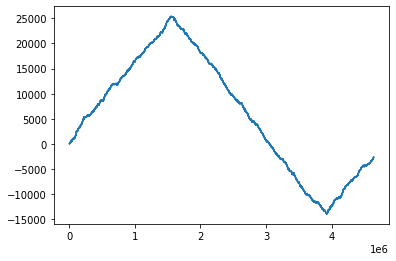

In [25]:
plt.plot(e_coli_skew)

In [31]:
e_coli_skew_min = e_coli_skew.index(min(e_coli_skew))

In [32]:
e_coli_genome[e_coli_skew_min: e_coli_skew_min + 500]

'aatgatgatgacgtcaaaaggatccggataaaacatggtgattgcctcgcataacgcggtatgaaaatggattgaagcccgggccgtggattctactcaactttgtcggcttgagaaagacctgggatcctgggtattaaaaagaagatctatttatttagagatctgttctattgtgatctcttattaggatcgcactgccctgtggataacaaggatccggcttttaagatcaacaacctggaaaggatcattaactgtgaatgatcggtgatcctggaccgtataagctgggatcagaatgaggggttatacacaactcaaaaactgaacaacagttgttctttggataactaccggttgatccaagcttcctgacagagttatccacagtagatcgcacgatctgtatacttatttgagtaaattaacccacgatcccagccattcttctgccggatcttccggaatgtcgtgatcaagaatgttgatcttcagtg'

In [33]:
def hamming_distance(p, q):
    """
    Computes the hamming distance between strings `p` and `q`.
    """
    if len(p) != len(q):
        raise ValueError("p and q should be of equal length to calculate their hamming distance.")
        
    d = 0
    for i in range(len(p)):
        if p[i] != q[i]:
            d += 1
            
    return d

In [34]:
hamming_distance("rohit", "rohii")

1

In [35]:
hamming_distance("cat", "bar")

2

In [39]:
def approximate_pattern_matching(pattern, text, d):
    """
    Returns the starting positions where `pattern` appears as a substring of `text`
    with at most `d` mismatches.
    """
    lt, lp = len(text), len(pattern)
    if lp > lt:
        raise ValueError("text should be a longer string than pattern")
        
    positions = []
    for i in range(lt - lp):
        candidate = text[i: i + lp]
        distance = hamming_distance(candidate, pattern)
        if distance <= d:
            positions.append(i)
                   
    return positions

In [40]:
approximate_pattern_matching("AAAAA", "AACAAGCATAAACATTAAAGAG", 1)

[0, 7, 9, 16]

In [41]:
approximate_pattern_matching("AAAAA", "AACAAGCATAAACATTAAAGAG", 2)

[0, 1, 3, 6, 7, 8, 9, 10, 13, 14, 15, 16]

In [42]:
def approximate_frequent_words(text, k, d):
    """
    Calculate the most approximate frequent contiguous of words of length `k` in `text` with
    atmost `d` mismatches.
    """
    lt = len(text)
    counts = []
    pattern2count = {}
    for i in range(lt - k):
        pattern = text[i:i + k]
        if pattern not in pattern2count:
            pattern2count[pattern] = len(approximate_pattern_matching(pattern, text, d))
            
    max_count = max(pattern2count.values())
    frequent_patterns = [pattern for pattern, count in pattern2count.items() if count == max_count]
    
    return frequent_patterns, max_count

In [43]:
approximate_frequent_words(e_coli_genome[e_coli_skew_min:e_coli_skew_min + 500], 9, 1)

(['aaaaggatc', 'aaaggatcc'], 3)

In [48]:
def approximate_frequent_words_with_reverse_components(text, k, d):
    """
    Calculate the most approximate frequent patterns of length `k` in `text` with
    atmost `d` mismatches, taking into account reverse components of patterns.
    """
    lt = len(text)
    counts = []
    pattern2count = {}
    for i in range(lt - k):
        pattern = text[i:i + k]
        rev_pattern = reverse_complement(pattern)
        if pattern not in pattern2count and rev_pattern not in pattern2count:
            pattern2count[pattern] = (len(approximate_pattern_matching(pattern, text, d)) 
                                      + len(approximate_pattern_matching(rev_pattern, text, d)))
            
    max_count = max(pattern2count.values())
    frequent_patterns = [pattern for pattern, count in pattern2count.items() if count == max_count]
    
    return frequent_patterns, max_count

In [49]:
approximate_frequent_words_with_reverse_components(e_coli_genome[e_coli_skew_min:e_coli_skew_min + 500], 9, 1)

(['ggatcctgg',
  'tgtggataa',
  'gtggataac',
  'agctgggat',
  'gctgggatc',
  'ctgggatca'],
 4)